# Loss Run info extraction

In [1]:
import lossrun
import matplotlib.pyplot as plt
import cv2

## Load data and clasify as loss report, npdb and emails

The file is a: LOSSRUN


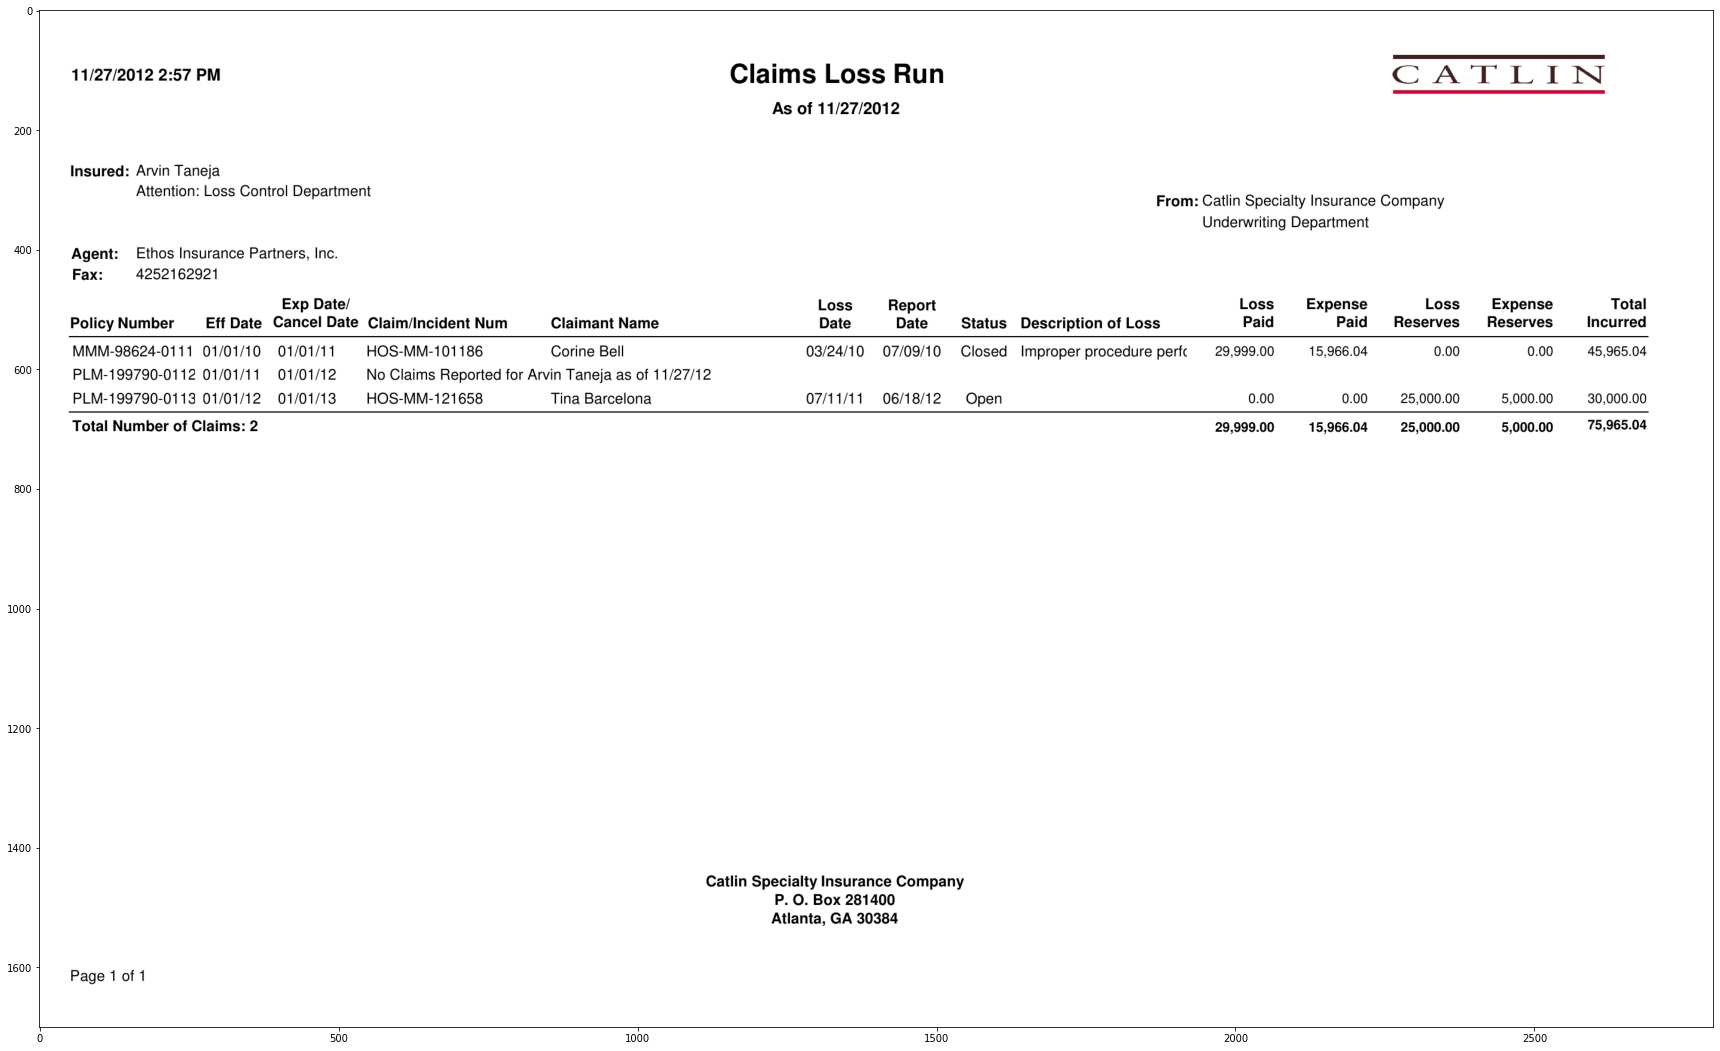

(<Figure size 2160x1800 with 1 Axes>,
 None)

In [13]:
## load file as image and text
_file = 'Taneja_2012_Catlin_loss_run_10 CAT-YES'
_image_file = 'images/'+ _file + '.png'
_txt_file = 'text/'+ _file + '.txt'

# load image
_image = cv2.imread(_image_file)
# load text
txt_dict = lossrun.read_dict(_txt_file)

# check the result
print('The file is a:', lossrun.is_report(_image, txt_dict)[0])
plt.figure(figsize=(30,25)),plt.imshow(_image),plt.show()

## Process acording the report

In [14]:
# Check the report type and determinate the rules accordig to file type 
report_type, topic_conf, ent_conf = lossrun.is_report(_image,txt_dict)

suspects = lossrun.search_rules(txt_dict, topic_conf)
suspects

[('insured', 'INSURED', 10, 54, 260),
 ('policy_num', 'POLICY NUMBER', 87, 54, 514),
 ('report_date', 'REPORT', 80, 1422, 480),
 ('report_date', 'AS OF', 40, 1227, 154),
 ('report_date', 'AS OF', 137, 966, 605),
 ('total_incured', 'INCURRED', 108, 2591, 512),
 ('status', 'STATUS', 100, 1543, 513)]

## Relate the information acording text distribution

In [15]:
import re

spatial_filter = lossrun.spatial_filter(txt_dict, suspects, report_type)
spatial_filter_topics = len(spatial_filter)


for topic in range(spatial_filter_topics):
    # clean the sentece
    #spatial_filter[topic] = list(dict.fromkeys(spatial_filter[topic]))
    sentence  = ' '.join(spatial_filter[topic])
    sentence = re.sub('\s+',' ', sentence)
    print('Sentence associate to: ' + suspects[topic][0].upper() +': ' + sentence)
    print('_'*80 + '\n')


Sentence associate to: INSURED:  Agent: Fax: Policy Number MMM-98624-0111 PLM-199790-0112 PLM-199790-0113 Total Number Page 1 of Arvin Taneja
________________________________________________________________________________

Sentence associate to: POLICY_NUM:  MMM-98624-0111 PLM-199790-0112 PLM-199790-0113 Total Number Page 1 Number — Eff Date Cancel
________________________________________________________________________________

Sentence associate to: REPORT_DATE: Date 07/09/10 06/18/12 Company 281400 30384 Date
________________________________________________________________________________

Sentence associate to: REPORT_DATE:  P. Atlanta, of 11/27/2012
________________________________________________________________________________

Sentence associate to: REPORT_DATE: of 11/27/12
________________________________________________________________________________

Sentence associate to: TOTAL_INCURED: 45,965.04 30,000.00 75,965.04
________________________________________________________

## Relate the information acording named enity recognition


In [19]:
import spacy 
if (report_type == 'NPDB') or (report_type == 'EMAIL'):
    nlp = spacy.load('en_core_web_lg')
else:
    nlp = spacy.load('./config/lossrun_ner_model')

In [21]:
import string as String
printable = set(String.printable)

for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    string = re.sub('\s+',' ',string)
    
    
    # remove non printalbes elemts
    string = ''.join(filter(lambda x: x in printable, string))
    #print (string)
    doc = nlp(string)

    for ent in doc.ents:
        print('It will be added to data base : ')
        print(ent.text + ' in ' + ent.label_)
        print('\n.................')

It will be added to data base : 
11/27/2012 in DATE

.................
It will be added to data base : 
11/27/12 in DATE

.................
It will be added to data base : 
75,965.04 in MONEY

.................


## Relate the information acording contextual relation

In [7]:
# load contextual model
import string as String
printable = set(String.printable)

for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    string = re.sub('\s+',' ',string)
    
    
    # remove non printalbes elemts
    string = ''.join(filter(lambda x: x in printable, string))
    #print (string)
    _suspect = nlp(string)
    _topic = nlp(suspects[i][0])
    print(_suspect.similarity(_topic) , i)

0.0 0
0.0 1
0.0 2


## Insert candidates to data base

In [8]:
Lossrun_models.registerRecord(timeDimDay = 12,
                              timeDimMonth = 9,
                              timeDimYear = 20,
                              policyDimStatus = "Open", 
                              reportGeneratorDimName = _temp[encuentra(_temp,'ORG')][0], 
                              insuredDimName = _temp[encuentra(_temp,'ORG')][0],
                              insurerDimName = _temp[encuentra(_temp,'PERSON')][0], 
                              statusName = "Open", 
                              lossRunReportDimDate = datetime.datetime.now()) 

NameError: name 'Lossrun_models' is not defined

### Contextual data


In [38]:
tok_1 = nlp('DATE')
for i in txt_dict['text']:
    tok_2 = nlp(i.upper())
    if tok_1.similarity(tok_2) > 0.8:
        print (i)

Date
Date


In [ ]:
lossrun.load